In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
data_frame=pd.read_csv('Bengaluru_House_Data.csv')
data_frame.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Data Visualization

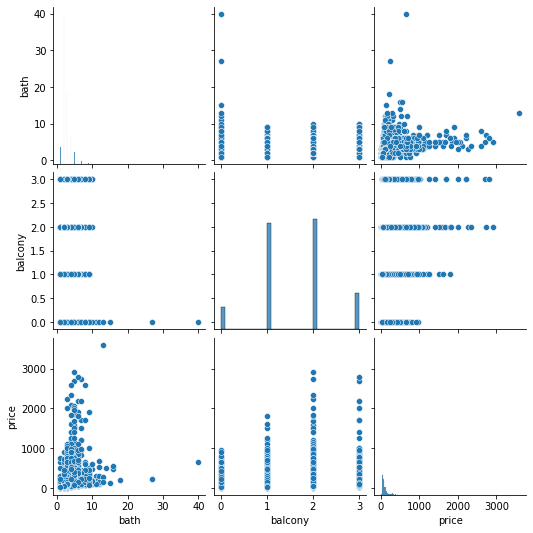

In [4]:
sn.pairplot(data_frame)

In [5]:
#Data Preprocessing:- 

In [6]:
data_frame.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
data_frame.shape

(13320, 9)

In [8]:
#Dropping the columns availaibility, society and area does not play any important factor in predicting price

In [9]:
data_frame1=data_frame.drop(['area_type','availability','society'],axis='columns')
data_frame1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
data_frame1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<AxesSubplot:>

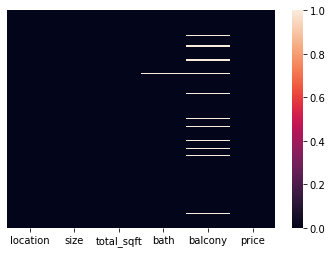

In [11]:
sn.heatmap(data_frame1.isnull(),yticklabels=False)

In [12]:
#Dropping the NA values

data_frame2=data_frame1.dropna()
data_frame2.isnull().sum()
data_frame2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
data_frame2.shape

(12710, 6)

In [14]:
data_frame2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
data_frame2['bhk']=data_frame2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-15-b39fbf193bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame2['bhk']=data_frame2['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
data_frame2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
data_frame2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [18]:
data_frame2[data_frame2['bhk']>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [19]:
#Exploring the total square feet feature

In [20]:
data_frame2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
#Function that will take a number as range and will convert into a value

def convert_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
data_frame2[~data_frame2['total_sqft'].apply(convert_num)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [23]:
def converionOfRange(x):
    tokenising=x.split('-')
    if len(tokenising)==2:
        return (float(tokenising[0]) + float(tokenising[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [24]:
converionOfRange('3067 - 8156')

5611.5

In [25]:
data_frame3=data_frame2.copy()
data_frame3

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [26]:
data_frame3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [27]:
data_frame3['total_sqft']=data_frame3['total_sqft'].apply(converionOfRange)
data_frame3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [28]:
#Feature Engineering

In [29]:
data_frame4=data_frame3.copy(deep=True)


In [30]:
data_frame4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [31]:
data_frame4['Price_per_sqft']=data_frame4['price'] * 1000 / data_frame4['total_sqft']
data_frame4.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42.500000


In [32]:
data_frame5=data_frame4.drop(['balcony'],axis='columns')
data_frame5

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,65.306122
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [33]:
data_frame5.isnull().sum()

location           0
size               0
total_sqft        42
bath               0
price              0
bhk                0
Price_per_sqft    42
dtype: int64

In [34]:
data_frame6=data_frame5.dropna()
data_frame6

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,65.306122
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [35]:
data_frame6.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
Price_per_sqft    0
dtype: int64

In [36]:
data_frame6

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,65.306122
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [37]:
data_frame6.location=data_frame6.location.apply(lambda x: x.strip())

c:\python38\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
statisticsLocation= data_frame6.groupby('location')['location'].agg('count').sort_values(ascending=False)
statisticsLocation.head(10)

location
Whitefield               514
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           259
Thanisandra              233
Yelahanka                206
Uttarahalli              186
Hebbal                   173
Raja Rajeshwari Nagar    168
Marathahalli             164
Name: location, dtype: int64

In [39]:
statisticsLocation[statisticsLocation<=10]

location
Nagappa Reddy Layout    10
Thyagaraja Nagar        10
Ganga Nagar             10
Naganathapura           10
Dairy Circle            10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1013, dtype: int64

In [40]:
locationLessthan10=statisticsLocation[statisticsLocation<=10]
locationLessthan10.head(20)
                            

location
Nagappa Reddy Layout     10
Thyagaraja Nagar         10
Ganga Nagar              10
Naganathapura            10
Dairy Circle             10
HAL 2nd Stage            10
Gunjur Palya             10
Doddaballapur            10
Kalkere                  10
1st Block Koramangala    10
Kodigehalli              10
Basapura                 10
5th Block Hbr Layout      9
Dodsworth Layout          9
Nagadevanahalli           9
Chennammana Kere          9
Gollahalli                9
Kaverappa Layout          9
Sector 1 HSR Layout       9
Peenya                    9
Name: location, dtype: int64

In [41]:
data_frame6.location=data_frame6.location.apply(lambda x: 'other' if x in locationLessthan10 else x )

c:\python38\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
data_frame6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [43]:
data_frame6[data_frame6.bath>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1718,other,27 BHK,8000.0,27.0,230.0,27,28.750000
1768,other,11 Bedroom,1200.0,11.0,170.0,11,141.666667
1979,other,8 Bedroom,990.0,12.0,120.0,8,121.212121
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,275.000000
4916,other,14 BHK,1250.0,15.0,125.0,14,100.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,50.691244


Text(0, 0.5, 'count')

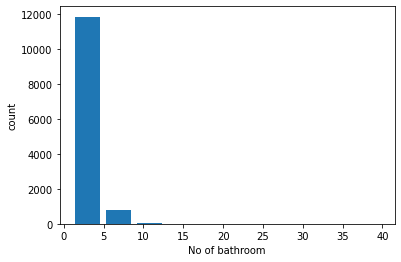

In [44]:
plt.hist(data_frame6.bath,rwidth=0.8)
plt.xlabel("No of bathroom")
plt.ylabel("count")


In [45]:
#Model Creation

In [46]:
dummies=pd.get_dummies(data_frame6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data_frame7=pd.concat([data_frame6,dummies.drop('other',axis='columns')],axis='columns')
data_frame7.head(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32.478632,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48.282443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,38.888889,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,105.924596,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2,38.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data_frame8=data_frame7.drop('location',axis='columns')
data_frame8.head(10)

,size,total_sqft,bath,price,bhk,Price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2 BHK,1056.0,2.0,39.07,2,36.998106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,2600.0,5.0,120.00,4,46.153846,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1440.0,2.0,62.00,3,43.055556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1521.0,3.0,95.00,3,62.458909,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1200.0,2.0,51.00,2,42.500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2 BHK,1170.0,2.0,38.00,2,32.478632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,3 BHK,1310.0,3.0,63.25,3,48.282443,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3 BHK,1800.0,2.0,70.00,3,38.888889,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,4 Bedroom,2785.0,5.0,295.00,4,105.924596,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,2 BHK,1000.0,2.0,38.00,2,38.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X=data_frame8.drop(['price','Price_per_sqft','size'],axis='columns')
X.head(10)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1310.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1800.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,2785.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,1000.0,2.0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=data_frame8.price
y.head(10)

0      39.07
1     120.00
2      62.00
3      95.00
4      51.00
5      38.00
8      63.25
10     70.00
11    295.00
12     38.00
Name: price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
model.score(X_test,y_test)

0.43652540067958634

In [55]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,3453.0,4.0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,1141.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=238)

In [57]:
def pricePredict(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [58]:
pricePredict('1st Phase JP Nagar',1000,2,2)

118.6723319095413